In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Kaggle/60k Stack Overflow Questions with Quality Rating/Data/data.csv')

In [4]:
train_data.head(5)

Id  ...         Y
0  34552656  ...  LQ_CLOSE
1  34552974  ...   LQ_EDIT
2  34553034  ...        HQ
3  34553174  ...        HQ
4  34553318  ...        HQ

[5 rows x 6 columns]

In [5]:
train_data.isnull().sum()

Id              0
Title           0
Body            0
Tags            0
CreationDate    0
Y               0
dtype: int64

In [6]:
for i in range(0,6):
  print(train_data['Title'].iloc[i])

Java: Repeat Task Every Random Seconds
How to get all the child records from different tables based on given parent ID in sql server
Why are Java Optionals immutable?
Text Overlay Image with Darkened Opacity React Native
Why ternary operator in swift is so picky?
hide/show fab with scale animation


In [7]:
pattern = "[^a-z A-Z]"
for i in range(len(train_data)):
    train_data['Title'].iloc[i] = re.sub(pattern, '', train_data['Title'].iloc[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
for i in range(0,6):
  print(train_data['Title'].iloc[i])

Java Repeat Task Every Random Seconds
How to get all the child records from different tables based on given parent ID in sql server
Why are Java Optionals immutable
Text Overlay Image with Darkened Opacity React Native
Why ternary operator in swift is so picky
hideshow fab with scale animation


In [9]:
corpus = []
for sentence in train_data['Title']:
  r = sentence.lower()
  words = nltk.word_tokenize(r)
  without_stop_words = [word for word in words if not word in stop_words]
  corpus.append(without_stop_words)
  #print(without_stop_words)

In [10]:
for i in range(0,6):
  print(corpus[i])

['java', 'repeat', 'task', 'every', 'random', 'seconds']
['get', 'child', 'records', 'different', 'tables', 'based', 'given', 'parent', 'id', 'sql', 'server']
['java', 'optionals', 'immutable']
['text', 'overlay', 'image', 'darkened', 'opacity', 'react', 'native']
['ternary', 'operator', 'swift', 'picky']
['hideshow', 'fab', 'scale', 'animation']


In [11]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

corpus_after_lemmatizer = []
corpus_after_stemmer = []

for i in corpus:
  sentence = [stemmer.stem(x) for x in i ]
  corpus_after_stemmer.append(' '.join(sentence))
  sentence = [lemmatizer.lemmatize(x, pos = wordnet.VERB) for x in i]
  corpus_after_lemmatizer.append(' '.join(sentence))

In [12]:
corpus_after_stemmer[1]

'get child record differ tabl base given parent id sql server'

In [13]:
corpus_after_lemmatizer[1]

'get child record different table base give parent id sql server'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features = 2000)
stemmer_data = count_vectorizer.fit_transform(corpus_after_stemmer).toarray()
lemmatizer_data = count_vectorizer.fit_transform(corpus_after_lemmatizer).toarray()
# Show the Bag-of-Words Model as a pandas DataFrame
#feature_names = count_vectorizer.get_feature_names()
#pd.DataFrame(bag_of_words, columns = feature_names)

In [15]:
train_data['Y'].iloc[1]

'LQ_EDIT'

In [16]:
train_data['Title'].iloc[1]

'How to get all the child records from different tables based on given parent ID in sql server'

In [17]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [18]:
Y = train_data['Y']

In [19]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
#uniques1, ids1 = np.unique(encoded_Y, return_inverse=True)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

In [20]:
'''
from sklearn import preprocessing
#y = np.asarray(train_data['Y'])
#y = y.reshape(-1,1)
le = preprocessing.LabelEncoder()
le.fit(train_data['Y'])
y = le.transform(train_data['Y'])
'''

"\nfrom sklearn import preprocessing\n#y = np.asarray(train_data['Y'])\n#y = y.reshape(-1,1)\nle = preprocessing.LabelEncoder()\nle.fit(train_data['Y'])\ny = le.transform(train_data['Y'])\n"

In [21]:
'''
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = np.asarray(train_data['Y'])
y = y.reshape(-1,1) 
y = ohe.fit_transform(y).toarray()
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\ny = np.asarray(train_data['Y'])\ny = y.reshape(-1,1) \ny = ohe.fit_transform(y).toarray()\n"

In [22]:
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [23]:
stemmer_data.shape, y.shape

((60000, 2000), (60000, 3))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stemmer_data, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((40200, 2000), (40200, 3), (19800, 2000), (19800, 3))

In [26]:
np.unique(y)

array([0., 1.], dtype=float32)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ReLU, ELU, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Dense(units = 2000, kernel_initializer = 'he_uniform',activation='relu',input_dim = 2000))
model.add(Dense(units = 100, kernel_initializer = 'he_uniform',activation='relu'))
model.add(Dense(units = 3, kernel_initializer = 'glorot_uniform',activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model_history = model.fit(X_train,y_train,validation_data = (X_test,y_test),batch_size=10,epochs=10)

Epoch 1/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.8921 - accuracy: 0.5661 - val_loss: 0.9008 - val_accuracy: 0.5752
Epoch 2/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.8522 - accuracy: 0.6052 - val_loss: 0.9047 - val_accuracy: 0.5919
Epoch 3/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.8392 - accuracy: 0.6221 - val_loss: 0.8938 - val_accuracy: 0.5862
Epoch 4/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.8272 - accuracy: 0.6337 - val_loss: 0.9467 - val_accuracy: 0.5885
Epoch 5/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.8072 - accuracy: 0.6491 - val_loss: 0.9512 - val_accuracy: 0.5803
Epoch 6/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.7830 - accuracy: 0.6636 - val_loss: 1.0280 - val_accuracy: 0.5870
Epoch 7/10
4020/4020 [==============================] - 17s 4ms/step - loss: 0.7475 - accuracy: 0.6866 - val_loss: 1.0566 - val_ac

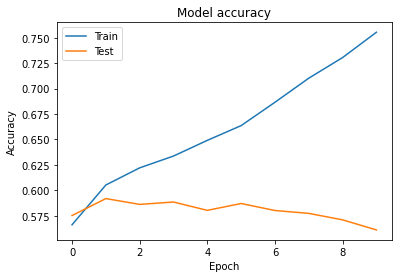

In [32]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

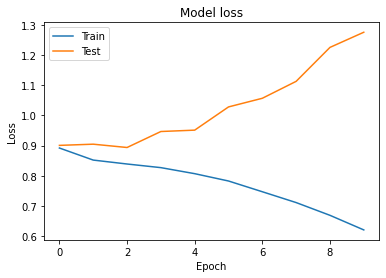

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [34]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred.shape,y_pred[0].shape

((19800, 3), (3,))

In [37]:
predictions = np.round(np.argmax(y_pred, axis=1)).astype(int)

In [38]:
predictions

array([1, 1, 0, ..., 2, 2, 1])

In [39]:
y_test = y_test.argmax(1)

In [46]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
cm = confusion_matrix(y_test, predictions)
#plt.show()

array([[4379, 1344,  862],
       [ 931, 3371, 2402],
       [ 758, 2394, 3359]])

In [ ]:
arr = [1,2,3,4]
arr

In [ ]:
uniques, ids = np.unique(arr, return_inverse=True)

In [ ]:
y_code = np_utils.to_categorical(ids, len(uniques))

In [ ]:
y_code

In [ ]:
uniques[y_code.argmax(1)]

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [ ]:
X_train.shape[0],X_test.shape[0]

In [ ]:
stop_words = set(stopwords.words("english"))
a  = [
      'Batman fight with superman and flash',
      'SUPERMAN fight with darkseid and doomsday'
      ]
for i in a:
    r = i.lower()
    words = nltk.word_tokenize(r)
    without_stop_words = [word for word in words if not word in stop_words]
    print(without_stop_words)

In [ ]:
sent = ['he', 'his', 'fighting', 'without', 'any', 'helping', 'hands']
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
str1 = [stemmer.stem(i) for i in sent ]
str2 = [lemmatizer.lemmatize(i, pos = wordnet.VERB) for i in sent ]
print(str1)
print(str2)


In [ ]:
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
  """
  Print the results of stemmind and lemmitization using the passed stemmer, lemmatizer, word a
  """
  print("Stemmer:", stemmer.stem(word))
  print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
  print()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)